<a href="https://colab.research.google.com/github/iferdous/Automated-Email-Unsubscriber/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


as you can see the median house value column, that is the one were going to keep track of. we also need to proess the ocean_proximity a bit differently since it is text we are trying to render which will NOT work.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


we have some data missing here. NAN = not a number.

In [ ]:
data.dropna(inplace = True) #the code in the parenthases drops the nans and saves the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


we need to divide the data up, one as x to test and one as y to train.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("median_house_value", axis = 1)
Y = data["median_house_value"]

#train, test, split ; x train y train = x test, y train

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
Y #will print only one column since we have no axis.

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#we will save 20 percent of the data for evaluating.

# train_test_split does this: 1.	Splits your data into two groups:

  # •	Training set (80%) → used to teach the model.
	# •	Test set (20%) → used to check how well the model learned.


In [ ]:
# we look at the test data at the end, were only going to be using the training data.

# we also now want to join the x training data and the y training data so we can analyze CORRELATIONS.

train_data = X_train.join(y_train)

In [ ]:
  train_data # joined x and y training data. note that is also does not include the ocean proximity.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10282,-117.78,33.86,16.0,3471.0,708.0,1769.0,691.0,4.1064,<1H OCEAN,246100.0
9160,-118.49,34.43,15.0,8244.0,1409.0,4453.0,1357.0,5.4829,<1H OCEAN,199600.0
3739,-118.39,34.18,42.0,1957.0,389.0,985.0,414.0,2.9327,<1H OCEAN,240200.0
2372,-119.55,36.70,31.0,1671.0,372.0,1371.0,347.0,2.3687,INLAND,63900.0
12887,-121.34,38.66,18.0,4164.0,963.0,2032.0,898.0,2.1190,INLAND,133100.0
...,...,...,...,...,...,...,...,...,...,...
14042,-117.14,32.76,28.0,3025.0,756.0,1328.0,695.0,2.6940,NEAR OCEAN,164100.0
5204,-118.29,33.93,43.0,2021.0,379.0,1051.0,352.0,3.3836,<1H OCEAN,129900.0
6666,-118.10,34.16,44.0,2795.0,496.0,1235.0,469.0,4.2386,INLAND,283700.0
13463,-117.37,34.13,17.0,2681.0,470.0,1621.0,459.0,3.8750,INLAND,118500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

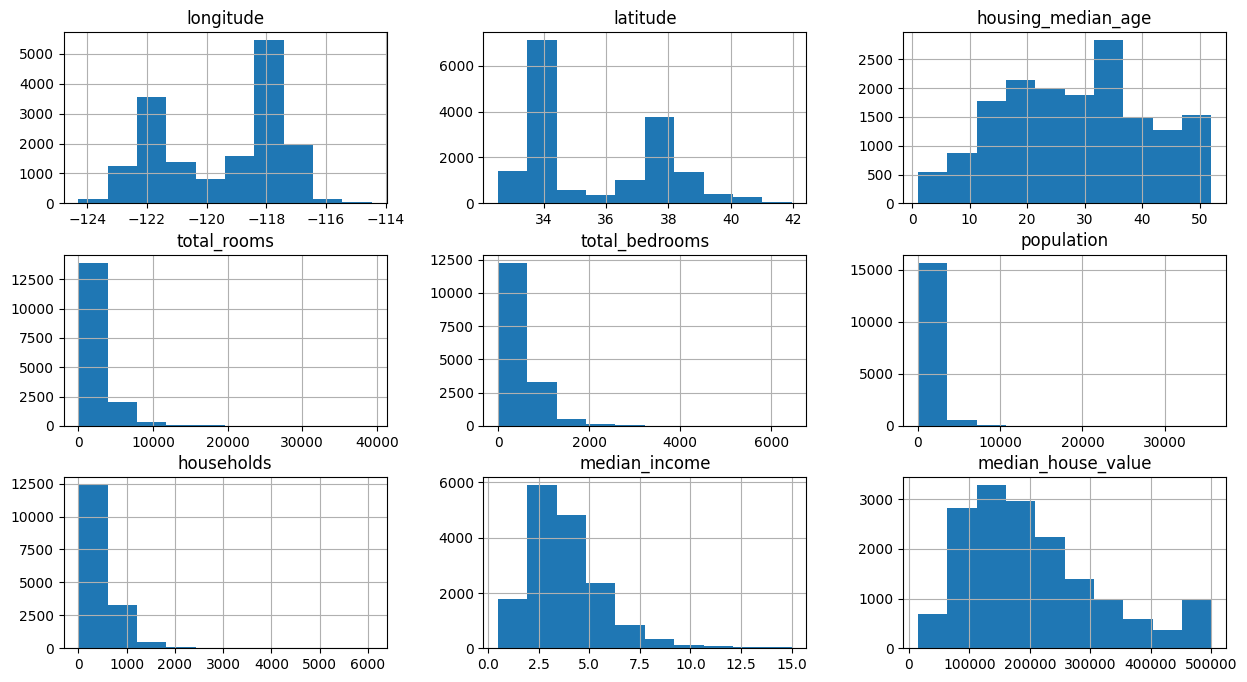

In [ ]:
train_data.hist(figsize= (15,8)) #.hist() is a command for a histogram to visualize the data.\

# figsize is just width and height.

you can see that the data is heavily skewed.

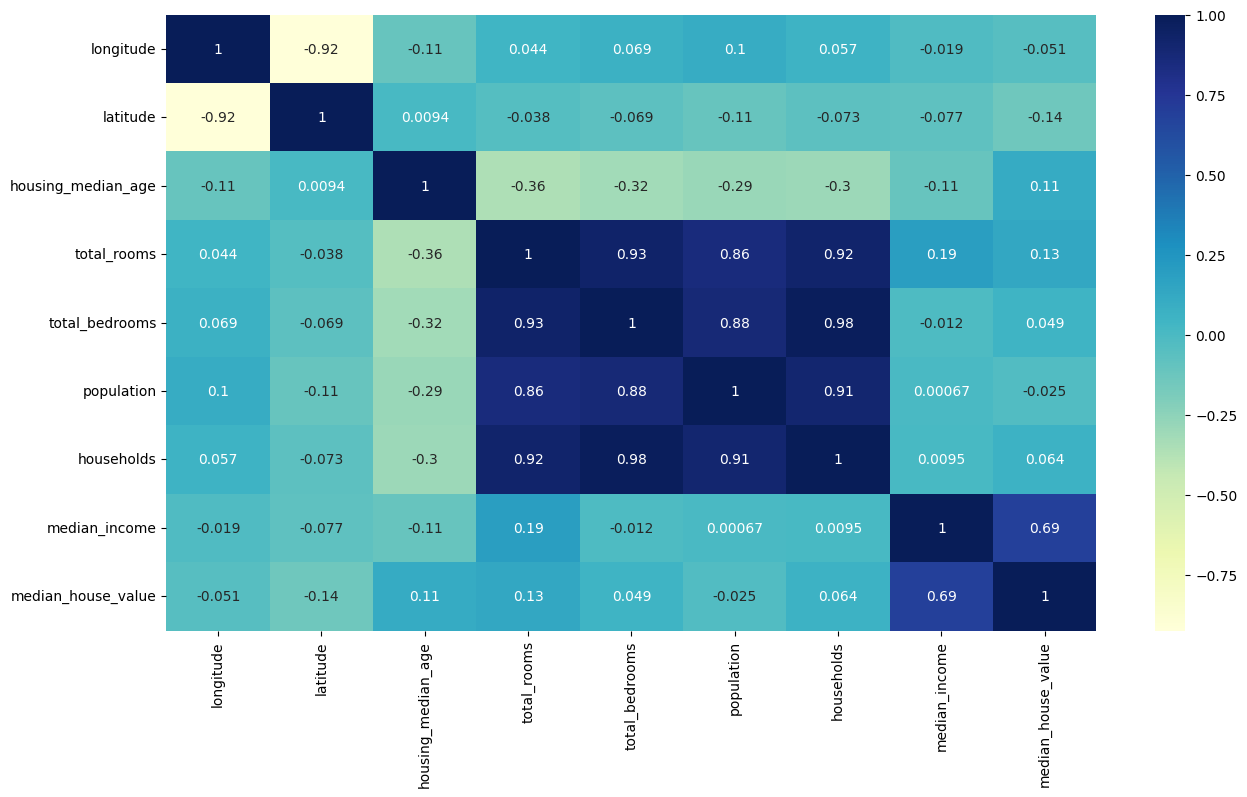

In [ ]:
# now we are going to try to find out the correlation in the data :

# select only numeric columns from train_data before computing correlation
numeric_data = train_data.select_dtypes(include=['number'])

plt.figure(figsize=(15, 8))  # sets the figure size
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")

# corr = correlation ; annot = seeing the actual annotation / correlation numbers.
plt.show()

lets make soem analyzations :

we can clearly see that median income of a colored block correlates quite highly with the median house value.

Dark blue (close to 1.0): Strong positive correlation - when one goes up, the other goes up
Dark red/green (close to -1.0): Strong negative correlation - when one goes up, the other goes down
Light colors (close to 0): Little to no relationship

The strongest predictor of house value is median income - wealthier neighborhoods have more expensive houses.


you can also see that the latitude is negatively correlated with the house value.

In [ ]:
# we are now going to take the lorgarithm of the graph since it is skewed.

train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1) # adding the 1 so we dont get 0's as values

train_data['total_vedrooms'] = np.log(train_data['total_bedrooms']+ 1)

train_data['population'] = np.log(train_data['population']+ 1)

train_data['households'] = np.log(train_data['households']+ 1)

# notice we are only taking the logarithms of these values becuase their GRAPHS are skewed.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_vedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

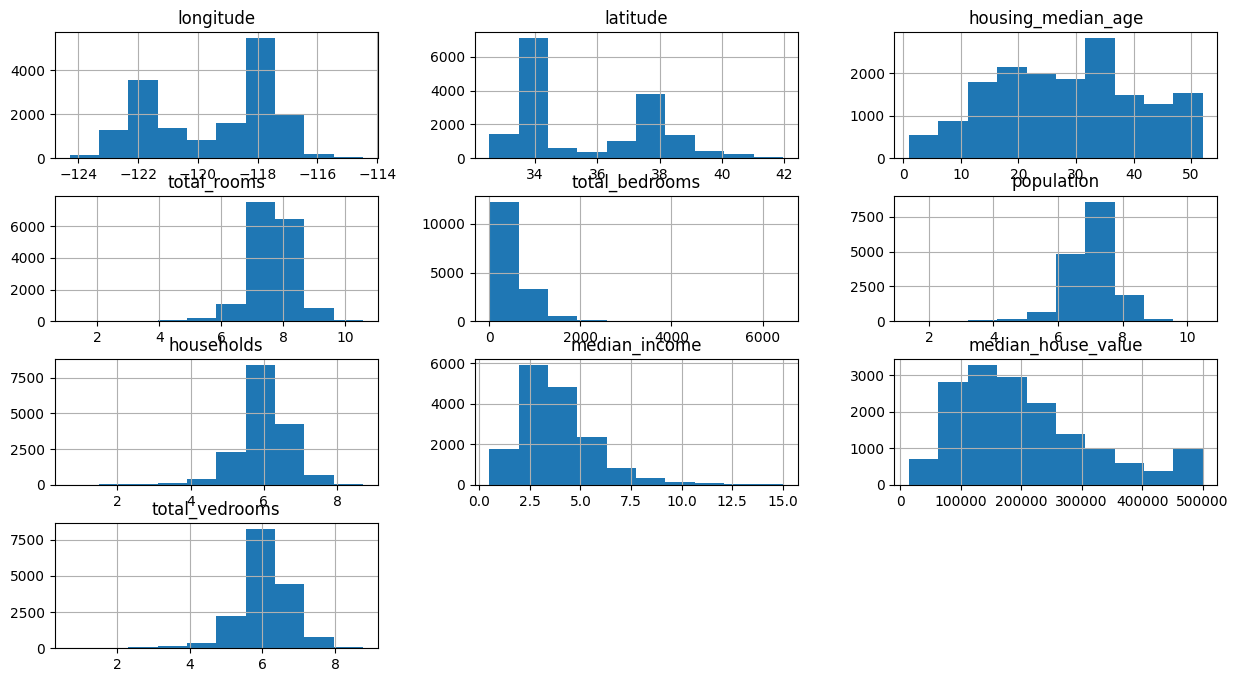

In [ ]:
train_data.hist(figsize= (15,8))

In [ ]:
# we want to use the ocean proximity as well now, since houses near the ocean are more valubale
# how are we going to make them numerical numbers though?

train_data.ocean_proximity.value_counts()

# we are going to give every single number you see a feature of 1 or 0.

,count
ocean_proximity,
<1H OCEAN,7206
INLAND,5206
NEAR OCEAN,2099
NEAR BAY,1831
ISLAND,4


time away from ocean can be represented with a yes or no, an hour away from the ocean? y/n



In [ ]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10282,True,False,False,False,False
9160,True,False,False,False,False
3739,True,False,False,False,False
2372,False,True,False,False,False
12887,False,True,False,False,False
...,...,...,...,...,...
14042,False,False,False,False,True
5204,True,False,False,False,False
6666,False,True,False,False,False
13463,False,True,False,False,False


sweet, now we can add this to our training data all together.

In [ ]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,total_vedrooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10282,-117.78,33.86,16.0,8.152486,708.0,7.478735,6.539586,4.1064,<1H OCEAN,246100.0,6.563856,True,False,False,False,False
9160,-118.49,34.43,15.0,9.017362,1409.0,8.401558,7.213768,5.4829,<1H OCEAN,199600.0,7.251345,True,False,False,False,False
3739,-118.39,34.18,42.0,7.579679,389.0,6.893656,6.028279,2.9327,<1H OCEAN,240200.0,5.966147,True,False,False,False,False
2372,-119.55,36.70,31.0,7.421776,372.0,7.224025,5.852202,2.3687,INLAND,63900.0,5.921578,False,True,False,False,False
12887,-121.34,38.66,18.0,8.334472,963.0,7.617268,6.801283,2.1190,INLAND,133100.0,6.871091,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14042,-117.14,32.76,28.0,8.014997,756.0,7.192182,6.545350,2.6940,NEAR OCEAN,164100.0,6.629363,False,False,False,False,True
5204,-118.29,33.93,43.0,7.611842,379.0,6.958448,5.866468,3.3836,<1H OCEAN,129900.0,5.940171,True,False,False,False,False
6666,-118.10,34.16,44.0,7.935945,496.0,7.119636,6.152733,4.2386,INLAND,283700.0,6.208590,False,True,False,False,False
13463,-117.37,34.13,17.0,7.894318,470.0,7.391415,6.131226,3.8750,INLAND,118500.0,6.154858,False,True,False,False,False


now, we can FINALLY drop the ocean proximity since we made them into actual values.

In [ ]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,total_vedrooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10282,-117.78,33.86,16.0,8.152486,708.0,7.478735,6.539586,4.1064,<1H OCEAN,246100.0,6.563856,True,False,False,False,False
9160,-118.49,34.43,15.0,9.017362,1409.0,8.401558,7.213768,5.4829,<1H OCEAN,199600.0,7.251345,True,False,False,False,False
3739,-118.39,34.18,42.0,7.579679,389.0,6.893656,6.028279,2.9327,<1H OCEAN,240200.0,5.966147,True,False,False,False,False
2372,-119.55,36.70,31.0,7.421776,372.0,7.224025,5.852202,2.3687,INLAND,63900.0,5.921578,False,True,False,False,False
12887,-121.34,38.66,18.0,8.334472,963.0,7.617268,6.801283,2.1190,INLAND,133100.0,6.871091,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14042,-117.14,32.76,28.0,8.014997,756.0,7.192182,6.545350,2.6940,NEAR OCEAN,164100.0,6.629363,False,False,False,False,True
5204,-118.29,33.93,43.0,7.611842,379.0,6.958448,5.866468,3.3836,<1H OCEAN,129900.0,5.940171,True,False,False,False,False
6666,-118.10,34.16,44.0,7.935945,496.0,7.119636,6.152733,4.2386,INLAND,283700.0,6.208590,False,True,False,False,False
13463,-117.37,34.13,17.0,7.894318,470.0,7.391415,6.131226,3.8750,INLAND,118500.0,6.154858,False,True,False,False,False


since we have it all sorted now we need to add it to the new training data / set.

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop("ocean_proximity", axis = 1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_vedrooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10282,-117.78,33.86,16.0,8.152486,708.0,7.478735,6.539586,4.1064,246100.0,6.563856,True,False,False,False,False
9160,-118.49,34.43,15.0,9.017362,1409.0,8.401558,7.213768,5.4829,199600.0,7.251345,True,False,False,False,False
3739,-118.39,34.18,42.0,7.579679,389.0,6.893656,6.028279,2.9327,240200.0,5.966147,True,False,False,False,False
2372,-119.55,36.70,31.0,7.421776,372.0,7.224025,5.852202,2.3687,63900.0,5.921578,False,True,False,False,False
12887,-121.34,38.66,18.0,8.334472,963.0,7.617268,6.801283,2.1190,133100.0,6.871091,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14042,-117.14,32.76,28.0,8.014997,756.0,7.192182,6.545350,2.6940,164100.0,6.629363,False,False,False,False,True
5204,-118.29,33.93,43.0,7.611842,379.0,6.958448,5.866468,3.3836,129900.0,5.940171,True,False,False,False,False
6666,-118.10,34.16,44.0,7.935945,496.0,7.119636,6.152733,4.2386,283700.0,6.208590,False,True,False,False,False
13463,-117.37,34.13,17.0,7.894318,470.0,7.391415,6.131226,3.8750,118500.0,6.154858,False,True,False,False,False


now we want to see how they correlate again by using the heatmap to visualize.

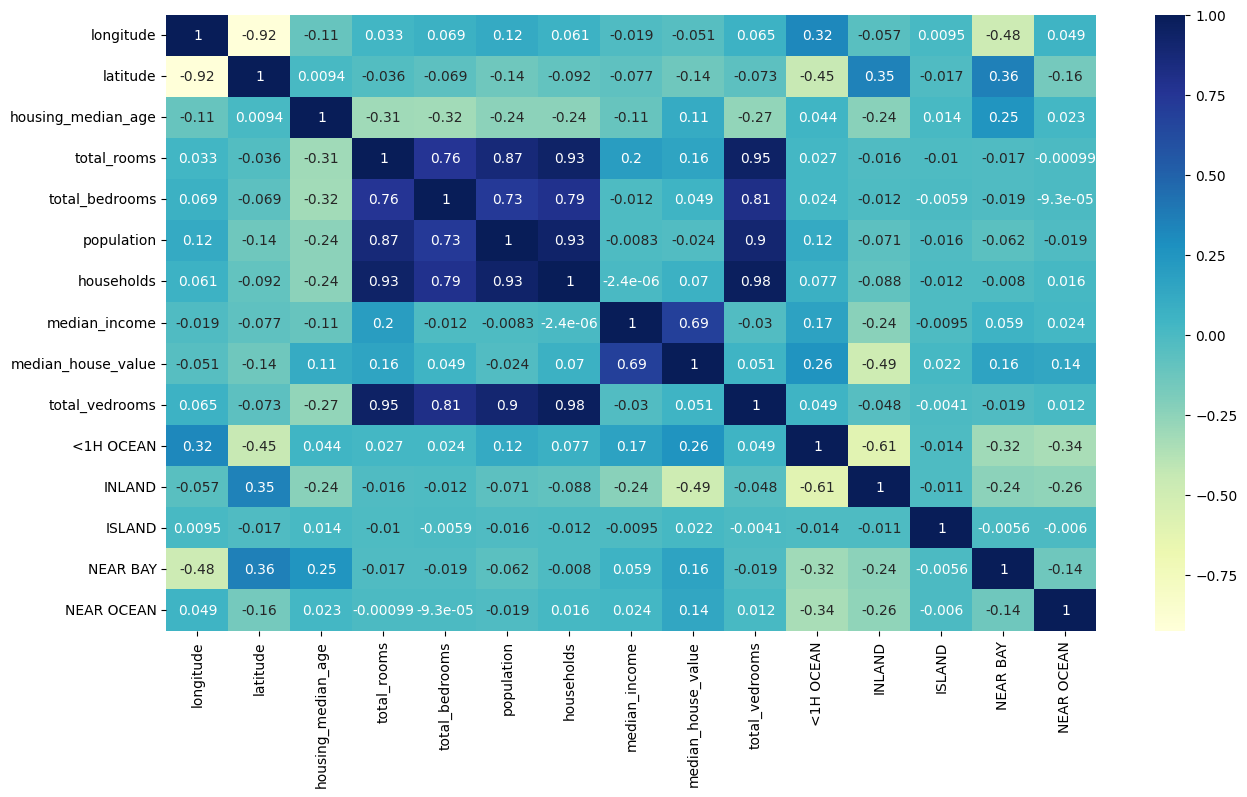

In [ ]:
plt.figure(figsize=(15, 8))

# This will automatically include all numeric columns including the boolean ones

sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

we can see that for example, there is a negative correlation with housing INLAND, you play less money, the median price is lower.

less than one hour away from ocean is positively correlated

<Axes: xlabel='latitude', ylabel='longitude'>

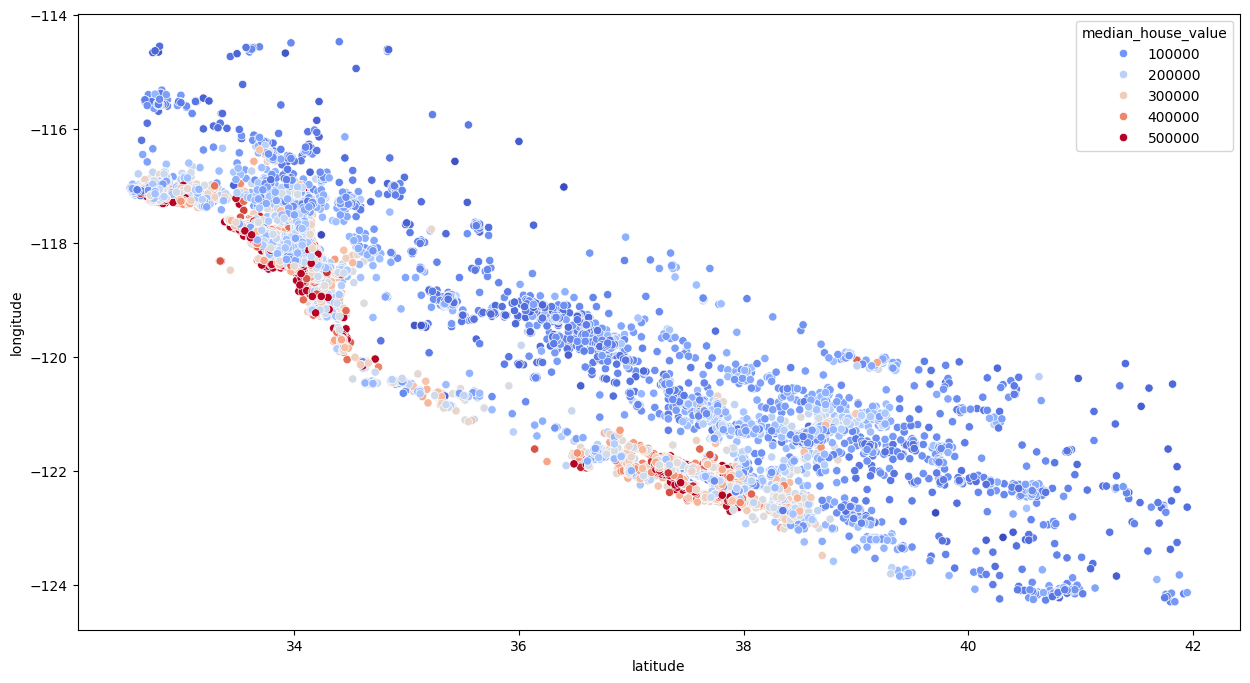

In [ ]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x = "latitude", y= "longitude", data = train_data, hue = "median_house_value", palette= "coolwarm")


the more red it gets the more expensive it tends to get.

the more blue the less expensive

if you look carefully, all the dots kind of represent the map of California.

In [ ]:
# how many rooms total presented are actually bedrooms?
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]


train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]



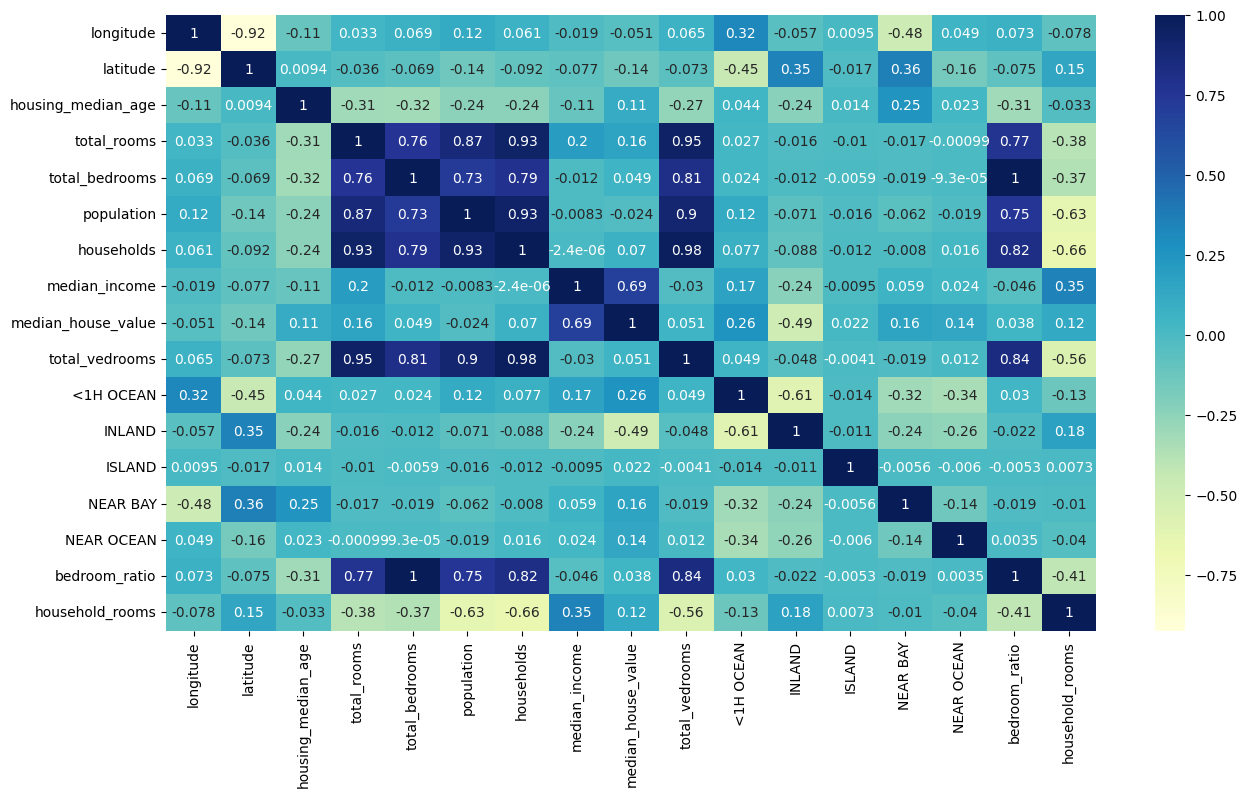

In [ ]:
plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# now we are going to train a simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# splitting the data again:
X_train = train_data.drop(['median_house_value'], axis=1)  # Features (everything except target)
y_train = train_data['median_house_value']                 # Target variable

# scale only X_train (features), not y_train
X_train_s = scaler.fit_transform(X_train)

# create and train the model
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1) # adding the 1 so we dont get 0's as values

test_data['total_vedrooms'] = np.log(test_data['total_bedrooms']+ 1)

test_data['population'] = np.log(test_data['population']+ 1)

test_data['households'] = np.log(test_data['households']+ 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop("ocean_proximity", axis = 1)


test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]


test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]







In [ ]:
X_test = test_data.drop(['median_house_value'], axis=1)  # Features (everything except target)
y_test = test_data['median_house_value']                # Target variable

In [ ]:
reg.score((X_test), y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-285666.7971738922

what does the number above really mean?

68% of the variation in California house prices is explained by your model's features (location, rooms, income)

0.0 = Model explains 0% (terrible - no better than guessing the average)
0.5 = Model explains 50% (decent)
0.68 = Model explains 68% (pretty good!)
1.0 = Model explains 100% (perfect - rarely happens in real data)

Good news: Your model captures most of the major factors affecting house prices
bad news : Room for improvement: 32% of price variation is still unexplained - could be due to:



In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s, y_test)

0.6561468844287033

A random forest model is a machine learning technique that combines multiple decision trees to make more accurate predictions

> Add blockquote



In [ ]:
# trying to find the optimal model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8143184345941926

In [ ]:
# we are going to be using grid search with cross validation.

#cross validation is we split it in into k folds, k being the value and one for the evalulation. 10 folds? make sure to leave 1 for testing.

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(X_train_s, y_train)



In [ ]:
grid_search.best_estimators_

In [ ]:
grid_search.best_estimators_.score(X_test_s, y_test)

this whole project was based on classification.